In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import configparser

config = configparser.ConfigParser()
config.read('config.ini')

from sklearn.preprocessing import LabelEncoder

pd.options.display.max_columns=None
pd.options.display.max_rows=None
pd.options.display.max_colwidth=None

Path

In [2]:
RAW_PATH = config['paths']['raw_data']
INTERIM_PATH = config['paths']['interim_data']
PROCESSED_PATH = config['paths']['processed_data']

Case data calls

In [3]:
data_calls_raw = pd.read_csv(f'{RAW_PATH}\case_data_calls.csv', delimiter=";", parse_dates=['date'])
print(data_calls_raw.info())

data_calls_raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     1155 non-null   object
 1   calls    1155 non-null   int64 
 2   weekday  1155 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 27.2+ KB
None


,date,calls,weekday
0,1-1-2013,2429,2
1,2-1-2013,3881,3
2,3-1-2013,3560,4
3,4-1-2013,3155,5
4,5-1-2013,1538,6


In [4]:
# check for nulls
data_calls_raw.isnull().sum()

date       0
calls      0
weekday    0
dtype: int64

In [5]:
# check dtypes
data_calls_raw.dtypes

date       object
calls       int64
weekday     int64
dtype: object

In [6]:
# covert date object to datetime
data_calls_01 = data_calls_raw.copy()
data_calls_01['date'] = pd.to_datetime(data_calls_01['date'].str.strip(), format='%d-%m-%Y')

print(data_calls_01.info())
data_calls_01.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     1155 non-null   datetime64[ns]
 1   calls    1155 non-null   int64         
 2   weekday  1155 non-null   int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 27.2 KB
None


,date,calls,weekday
0,2013-01-01,2429,2
1,2013-01-02,3881,3
2,2013-01-03,3560,4
3,2013-01-04,3155,5
4,2013-01-05,1538,6


In [7]:
# create a new column: month-day
data_calls_01['month_day'] = data_calls_01['date'].dt.strftime('%m-%d')
data_calls_01['month_year'] = data_calls_01['date'].dt.to_period('M')

print(data_calls_01.info())
data_calls_01.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1155 non-null   datetime64[ns]
 1   calls       1155 non-null   int64         
 2   weekday     1155 non-null   int64         
 3   month_day   1155 non-null   object        
 4   month_year  1155 non-null   period[M]     
dtypes: datetime64[ns](1), int64(2), object(1), period[M](1)
memory usage: 45.2+ KB
None


,date,calls,weekday,month_day,month_year
0,2013-01-01,2429,2,01-01,2013-01
1,2013-01-02,3881,3,01-02,2013-01
2,2013-01-03,3560,4,01-03,2013-01
3,2013-01-04,3155,5,01-04,2013-01
4,2013-01-05,1538,6,01-05,2013-01


In [8]:
data_calls_01.describe()

,date,calls,weekday
count,1155,1155.000000,1155.000000
mean,2014-08-01 00:00:00,4801.690909,4.000000
min,2013-01-01 00:00:00,1059.000000,1.000000
25%,2013-10-16 12:00:00,3279.500000,2.000000
50%,2014-08-01 00:00:00,4471.000000,4.000000
75%,2015-05-16 12:00:00,5970.000000,6.000000
max,2016-02-29 00:00:00,12864.000000,7.000000
std,NaN,2114.475574,2.000866


Case data reservations

In [9]:
data_reservations_raw = pd.read_csv(f'{RAW_PATH}\case_data_reservations.csv', delimiter=";")
print(data_reservations_raw.info())

data_reservations_raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   date                          790 non-null    object
 1   reservations_2months_advance  790 non-null    int64 
 2   total_reservations            790 non-null    int64 
 3   summer_break                  790 non-null    int64 
 4   christmas_break               790 non-null    int64 
 5   special_day                   790 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 37.2+ KB
None


,date,reservations_2months_advance,total_reservations,summer_break,christmas_break,special_day
0,1-1-2014,1494,7794,0,1,1
1,2-1-2014,2891,20074,0,1,0
2,3-1-2014,2790,17905,0,1,0
3,4-1-2014,2504,10880,0,0,0
4,5-1-2014,1522,8333,0,0,0


In [10]:
# check for nulls
data_reservations_raw.isnull().sum()

date                            0
reservations_2months_advance    0
total_reservations              0
summer_break                    0
christmas_break                 0
special_day                     0
dtype: int64

In [11]:
# check dtypes
data_reservations_raw.dtypes

date                            object
reservations_2months_advance     int64
total_reservations               int64
summer_break                     int64
christmas_break                  int64
special_day                      int64
dtype: object

In [12]:
# covert date object to datetime
data_reservations_01 = data_reservations_raw.copy()
data_reservations_01['date'] = pd.to_datetime(data_reservations_01['date'].str.strip(), format='%d-%m-%Y')

print(data_reservations_01.info())
data_reservations_01.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   date                          790 non-null    datetime64[ns]
 1   reservations_2months_advance  790 non-null    int64         
 2   total_reservations            790 non-null    int64         
 3   summer_break                  790 non-null    int64         
 4   christmas_break               790 non-null    int64         
 5   special_day                   790 non-null    int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 37.2 KB
None


,date,reservations_2months_advance,total_reservations,summer_break,christmas_break,special_day
0,2014-01-01,1494,7794,0,1,1
1,2014-01-02,2891,20074,0,1,0
2,2014-01-03,2790,17905,0,1,0
3,2014-01-04,2504,10880,0,0,0
4,2014-01-05,1522,8333,0,0,0


In [13]:
# create a new column: month-day
data_reservations_01['month_day'] = data_reservations_01['date'].dt.strftime('%m-%d')
data_reservations_01['month_year'] = data_reservations_01['date'].dt.to_period('M')

print(data_reservations_01.info())
data_reservations_01.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   date                          790 non-null    datetime64[ns]
 1   reservations_2months_advance  790 non-null    int64         
 2   total_reservations            790 non-null    int64         
 3   summer_break                  790 non-null    int64         
 4   christmas_break               790 non-null    int64         
 5   special_day                   790 non-null    int64         
 6   month_day                     790 non-null    object        
 7   month_year                    790 non-null    period[M]     
dtypes: datetime64[ns](1), int64(5), object(1), period[M](1)
memory usage: 49.5+ KB
None


,date,reservations_2months_advance,total_reservations,summer_break,christmas_break,special_day,month_day,month_year
0,2014-01-01,1494,7794,0,1,1,01-01,2014-01
1,2014-01-02,2891,20074,0,1,0,01-02,2014-01
2,2014-01-03,2790,17905,0,1,0,01-03,2014-01
3,2014-01-04,2504,10880,0,0,0,01-04,2014-01
4,2014-01-05,1522,8333,0,0,0,01-05,2014-01


In [14]:
data_reservations_01.describe()

,date,reservations_2months_advance,total_reservations,summer_break,christmas_break,special_day
count,790,790.000000,790.000000,790.000000,790.000000,790.000000
mean,2015-01-30 12:00:00,4558.364557,27689.987342,0.155696,0.035443,0.039241
min,2014-01-01 00:00:00,965.000000,6507.000000,0.000000,0.000000,0.000000
25%,2014-07-17 06:00:00,2914.250000,18434.250000,0.000000,0.000000,0.000000
50%,2015-01-30 12:00:00,4034.500000,25819.000000,0.000000,0.000000,0.000000
75%,2015-08-15 18:00:00,5661.750000,34496.750000,0.000000,0.000000,0.000000
max,2016-02-29 00:00:00,17681.000000,79727.000000,1.000000,1.000000,1.000000
std,NaN,2339.046454,12657.335897,0.362797,0.185014,0.194290


In [15]:
# extract ouf all the breaks into dicts
summer_break_dict =  dict(zip(data_reservations_01['month_day'], data_reservations_01['summer_break']))
christmas_break_dict =  dict(zip(data_reservations_01['month_day'], data_reservations_01['christmas_break']))
special_day_dict =  dict(zip(data_reservations_01['month_day'], data_reservations_01['special_day']))

# check output
print(special_day_dict)

{'01-01': 1, '01-02': 0, '01-03': 0, '01-04': 0, '01-05': 0, '01-06': 0, '01-07': 0, '01-08': 0, '01-09': 0, '01-10': 0, '01-11': 0, '01-12': 0, '01-13': 0, '01-14': 0, '01-15': 0, '01-16': 0, '01-17': 0, '01-18': 0, '01-19': 0, '01-20': 0, '01-21': 0, '01-22': 0, '01-23': 0, '01-24': 0, '01-25': 0, '01-26': 0, '01-27': 0, '01-28': 0, '01-29': 0, '01-30': 0, '01-31': 0, '02-01': 0, '02-02': 0, '02-03': 0, '02-04': 0, '02-05': 0, '02-06': 0, '02-07': 0, '02-08': 0, '02-09': 0, '02-10': 0, '02-11': 0, '02-12': 0, '02-13': 0, '02-14': 0, '02-15': 0, '02-16': 0, '02-17': 0, '02-18': 0, '02-19': 0, '02-20': 0, '02-21': 0, '02-22': 0, '02-23': 0, '02-24': 0, '02-25': 0, '02-26': 0, '02-27': 0, '02-28': 0, '03-01': 0, '03-02': 0, '03-03': 0, '03-04': 0, '03-05': 0, '03-06': 0, '03-07': 0, '03-08': 0, '03-09': 0, '03-10': 0, '03-11': 0, '03-12': 0, '03-13': 0, '03-14': 0, '03-15': 0, '03-16': 0, '03-17': 0, '03-18': 0, '03-19': 0, '03-20': 0, '03-21': 0, '03-22': 0, '03-23': 0, '03-24': 0, '03

Merge both

In [16]:
# merge
data_calls_reservations_merge_01 = pd.merge(data_calls_01, data_reservations_01, on="date", how="left")

print(data_calls_reservations_merge_01.info())
data_calls_reservations_merge_01.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   date                          1155 non-null   datetime64[ns]
 1   calls                         1155 non-null   int64         
 2   weekday                       1155 non-null   int64         
 3   month_day_x                   1155 non-null   object        
 4   month_year_x                  1155 non-null   period[M]     
 5   reservations_2months_advance  790 non-null    float64       
 6   total_reservations            790 non-null    float64       
 7   summer_break                  790 non-null    float64       
 8   christmas_break               790 non-null    float64       
 9   special_day                   790 non-null    float64       
 10  month_day_y                   790 non-null    object        
 11  month_year_y                  

,date,calls,weekday,month_day_x,month_year_x,reservations_2months_advance,total_reservations,summer_break,christmas_break,special_day,month_day_y,month_year_y
0,2013-01-01,2429,2,01-01,2013-01,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,2013-01-02,3881,3,01-02,2013-01,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,2013-01-03,3560,4,01-03,2013-01,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,2013-01-04,3155,5,01-04,2013-01,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,2013-01-05,1538,6,01-05,2013-01,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [17]:
# cleanup
data_calls_reservations_merge_01 = data_calls_reservations_merge_01.drop(['month_day_y', 'month_year_y'], axis=1)
data_calls_reservations_merge_01.rename(columns = {
    'month_day_x':'month_day',
    'month_year_x':'month_year'
}, inplace = True) 

data_calls_reservations_merge_01.head()

,date,calls,weekday,month_day,month_year,reservations_2months_advance,total_reservations,summer_break,christmas_break,special_day
0,2013-01-01,2429,2,01-01,2013-01,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,3881,3,01-02,2013-01,NaN,NaN,NaN,NaN,NaN
2,2013-01-03,3560,4,01-03,2013-01,NaN,NaN,NaN,NaN,NaN
3,2013-01-04,3155,5,01-04,2013-01,NaN,NaN,NaN,NaN,NaN
4,2013-01-05,1538,6,01-05,2013-01,NaN,NaN,NaN,NaN,NaN


In [18]:
# fill na break columns with dict
data_calls_reservations_merge_02 = data_calls_reservations_merge_01.copy()

data_calls_reservations_merge_02['summer_break'] = [summer_break_dict.get(row['month_day'], row['summer_break']) if pd.isna(row['summer_break']) else row['summer_break'] for _, row in data_calls_reservations_merge_02.iterrows()]
data_calls_reservations_merge_02['christmas_break'] = [christmas_break_dict.get(row['month_day'], row['christmas_break']) if pd.isna(row['christmas_break']) else row['christmas_break'] for _, row in data_calls_reservations_merge_02.iterrows()]
data_calls_reservations_merge_02['special_day'] = [special_day_dict.get(row['month_day'], row['special_day']) if pd.isna(row['special_day']) else row['special_day'] for _, row in data_calls_reservations_merge_02.iterrows()]

data_calls_reservations_merge_02.head()

,date,calls,weekday,month_day,month_year,reservations_2months_advance,total_reservations,summer_break,christmas_break,special_day
0,2013-01-01,2429,2,01-01,2013-01,NaN,NaN,0.0,1.0,1.0
1,2013-01-02,3881,3,01-02,2013-01,NaN,NaN,0.0,1.0,0.0
2,2013-01-03,3560,4,01-03,2013-01,NaN,NaN,0.0,0.0,0.0
3,2013-01-04,3155,5,01-04,2013-01,NaN,NaN,0.0,0.0,0.0
4,2013-01-05,1538,6,01-05,2013-01,NaN,NaN,0.0,0.0,0.0


EDA

Some of the questions a Head of Call Center might have: 
- What is the overall call trends in terms of N period?
    - where N: daily, weekly, quarterly, yearly
    - highest, lowest call volumes
    
- What are some of the seasonal impact on calls?
    - any influence
    - if there is an increase or decrease during breaks?

- Any coorelation between reservations and calls?
- Any impacts of breaks (summer, christmas, special) on calls?
- What is the average lead time for reservations?



Overall call trends

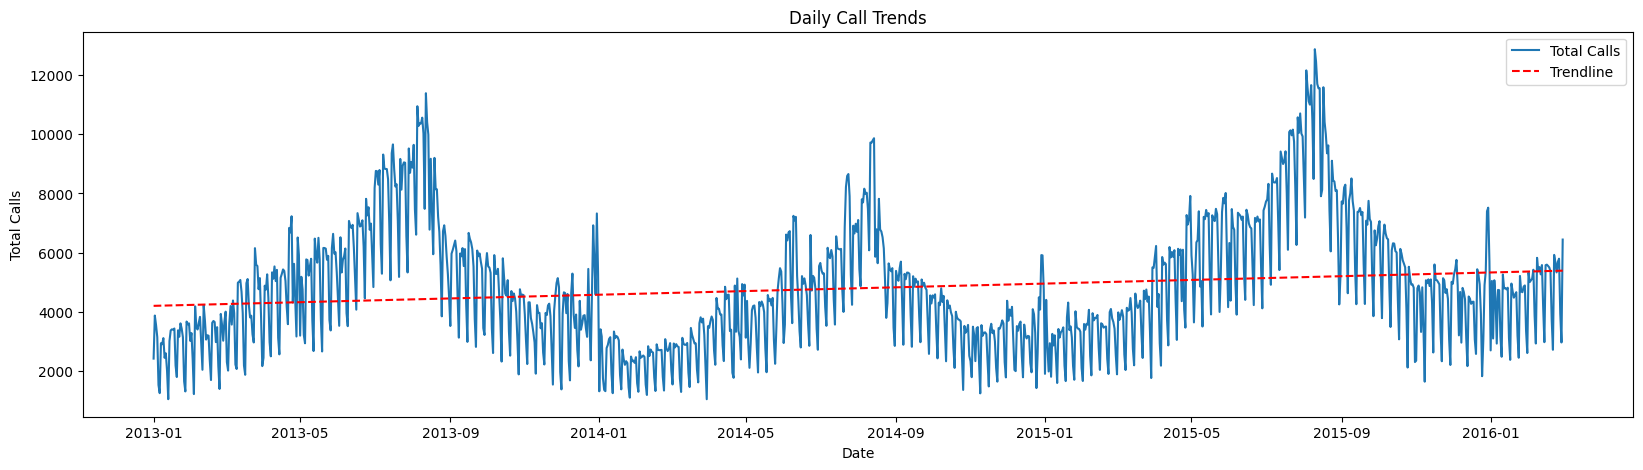

Slope of the trendline: 1.028
The trend is increasing.


In [19]:
# daily trends
trendline_coefficients_overall = np.polyfit(range(len(data_calls_reservations_merge_02)), data_calls_reservations_merge_02["calls"], 1)
trendline_overall = np.poly1d(trendline_coefficients_overall)

plt.figure(figsize=(20, 5))
plt.plot(data_calls_reservations_merge_02["date"], data_calls_reservations_merge_02["calls"], label="Total Calls")
plt.plot(data_calls_reservations_merge_02["date"], trendline_overall(range(len(data_calls_reservations_merge_02))), label="Trendline", color="red", linestyle="--")
plt.title("Daily Call Trends")
plt.xlabel("Date")
plt.ylabel("Total Calls")
plt.legend()
plt.show()

slope = trendline_coefficients_overall[0]
print("Slope of the trendline:", round(slope, 3))

if slope > 0:
    print("The trend is increasing.")
elif slope < 0:
    print("The trend is decreasing.")
else:
    print("The trend is flat.")

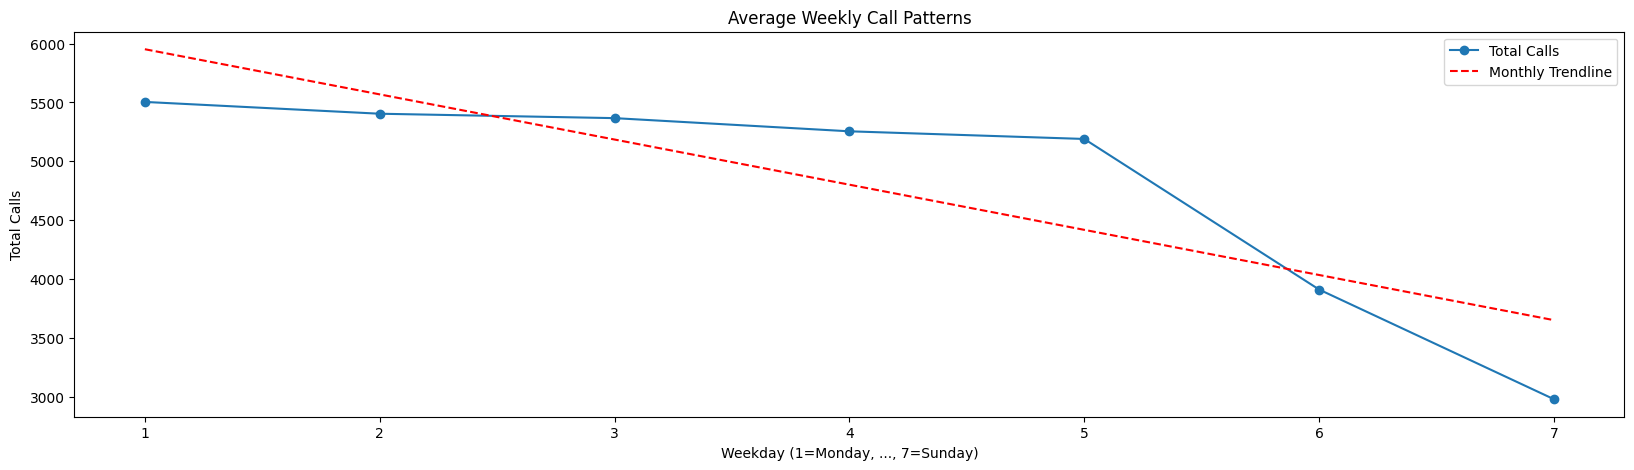

Slope of the trendline: -383.542
The trend is decreasing.


In [20]:
# weekly trends
weekly_call_patterns = data_calls_reservations_merge_02.groupby("weekday")["calls"].mean()

trendline_coefficients_weekly = np.polyfit(range(len(weekly_call_patterns)), weekly_call_patterns.values, 1)
trendline_weekly = np.poly1d(trendline_coefficients_weekly)

plt.figure(figsize=(20, 5))
plt.plot(weekly_call_patterns.index, weekly_call_patterns.values, label="Total Calls", marker='o')
plt.plot(weekly_call_patterns.index, trendline_weekly(range(len(weekly_call_patterns))), label="Monthly Trendline", color="red", linestyle="--")
plt.title("Average Weekly Call Patterns")
plt.xlabel("Weekday (1=Monday, ..., 7=Sunday)")
plt.ylabel("Total Calls")
plt.legend()
plt.show()

slope = trendline_coefficients_weekly[0]
print("Slope of the trendline:", round(slope, 3))

if slope > 0:
    print("The trend is increasing.")
elif slope < 0:
    print("The trend is decreasing.")
else:
    print("The trend is flat.")

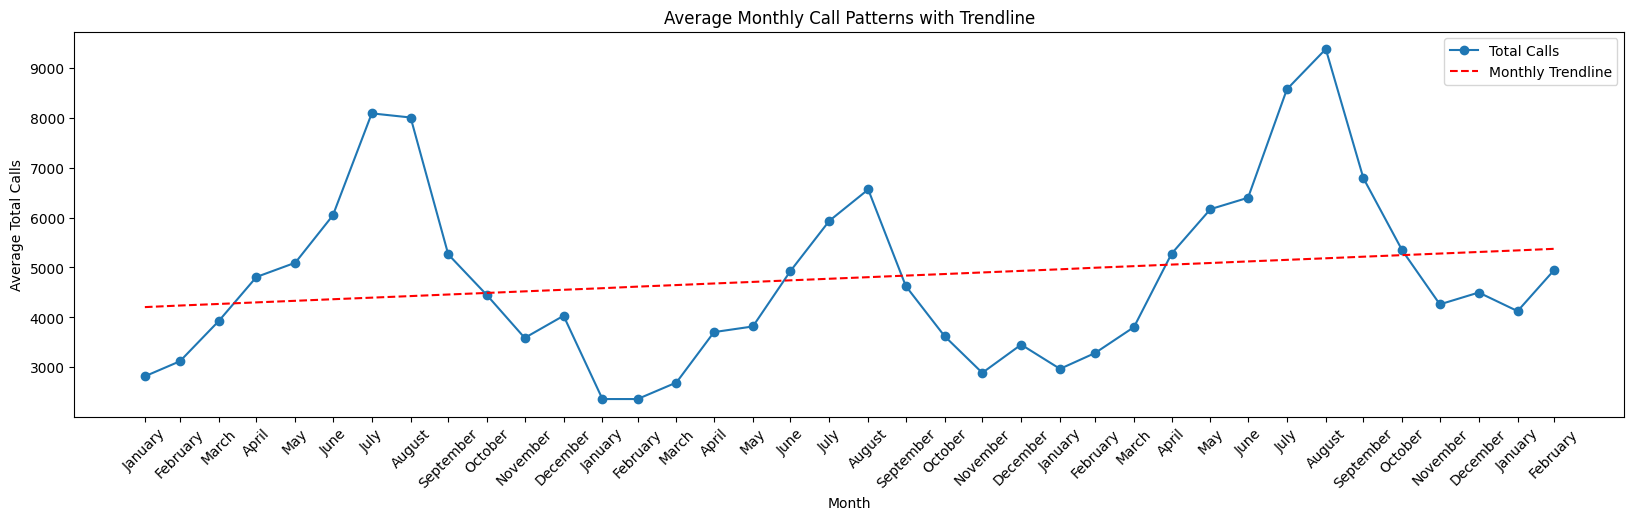

Slope of the trendline: 31.61
The trend is increasing.


In [21]:
# monthly trends
monthly_call_patterns = data_calls_reservations_merge_02.resample("M", on="date")["calls"].mean()

trendline_coefficients_monthly = np.polyfit(range(len(monthly_call_patterns)), monthly_call_patterns.values, 1)
trendline_monthly = np.poly1d(trendline_coefficients_monthly)

plt.figure(figsize=(20, 5))
plt.plot(monthly_call_patterns.index, monthly_call_patterns.values, label="Total Calls", marker='o')
plt.plot(monthly_call_patterns.index, trendline_monthly(range(len(monthly_call_patterns))), label="Monthly Trendline", color="red", linestyle="--")
plt.title("Average Monthly Call Patterns with Trendline")
plt.xlabel("Month")
plt.ylabel("Average Total Calls")
plt.xticks(monthly_call_patterns.index, [month.strftime('%B') for month in monthly_call_patterns.index], rotation=45)
plt.legend()
plt.show()

slope = trendline_coefficients_monthly[0]
print("Slope of the trendline:", round(slope, 3))

if slope > 0:
    print("The trend is increasing.")
elif slope < 0:
    print("The trend is decreasing.")
else:
    print("The trend is flat.")

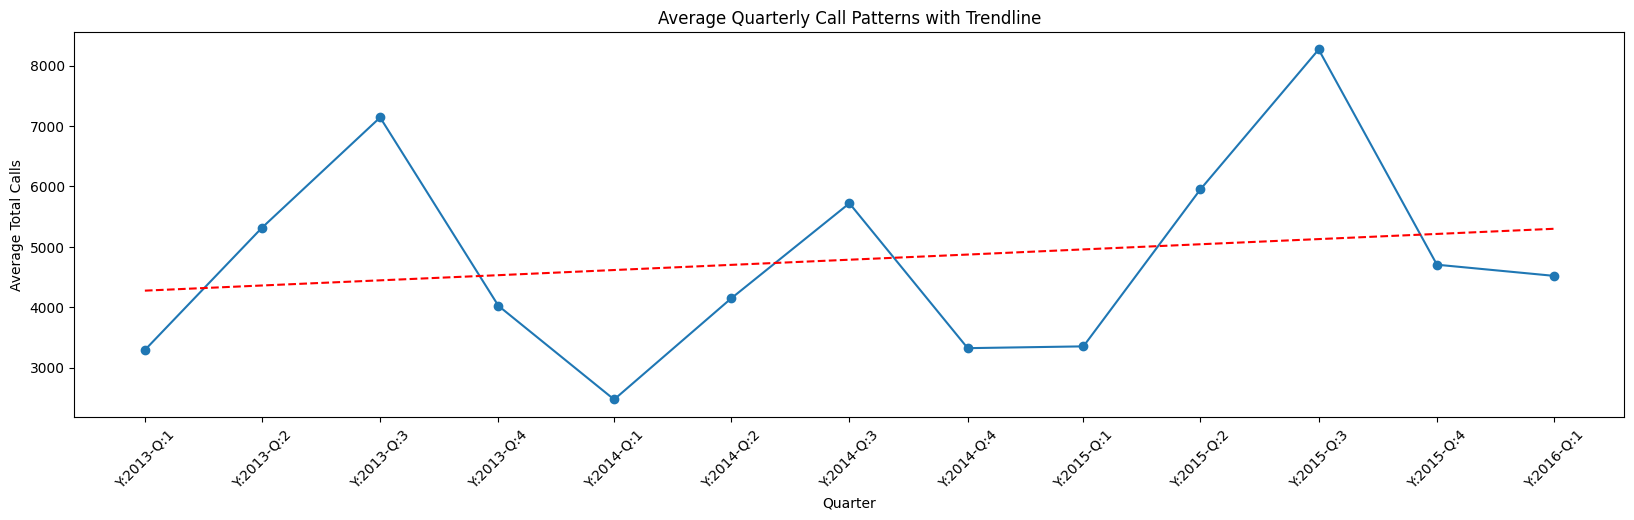

Slope of the trendline: 85.33
The trend is increasing.


In [22]:
# monthly trends
quarterly_call_patterns = data_calls_reservations_merge_02.resample("Q", on="date")["calls"].mean()

trendline_coefficients_quarterly = np.polyfit(range(len(quarterly_call_patterns)), quarterly_call_patterns.values, 1)
trendline_quarterly = np.poly1d(trendline_coefficients_quarterly)

plt.figure(figsize=(20, 5))
plt.plot(quarterly_call_patterns.index, quarterly_call_patterns.values, label="Total Calls", marker='o')
plt.plot(quarterly_call_patterns.index, trendline_quarterly(range(len(quarterly_call_patterns))), label="Quarterly Trendline", color="red", linestyle="--")
plt.title("Average Quarterly Call Patterns with Trendline")
plt.xlabel("Quarter")
plt.ylabel("Average Total Calls")
plt.xticks(quarterly_call_patterns.index, [f"Y:{q.year}-Q:{q.quarter}" for q in quarterly_call_patterns.index], rotation=45)
plt.show()

slope = trendline_coefficients_quarterly[0]
print("Slope of the trendline:", round(slope, 3))

if slope > 0:
    print("The trend is increasing.")
elif slope < 0:
    print("The trend is decreasing.")
else:
    print("The trend is flat.")

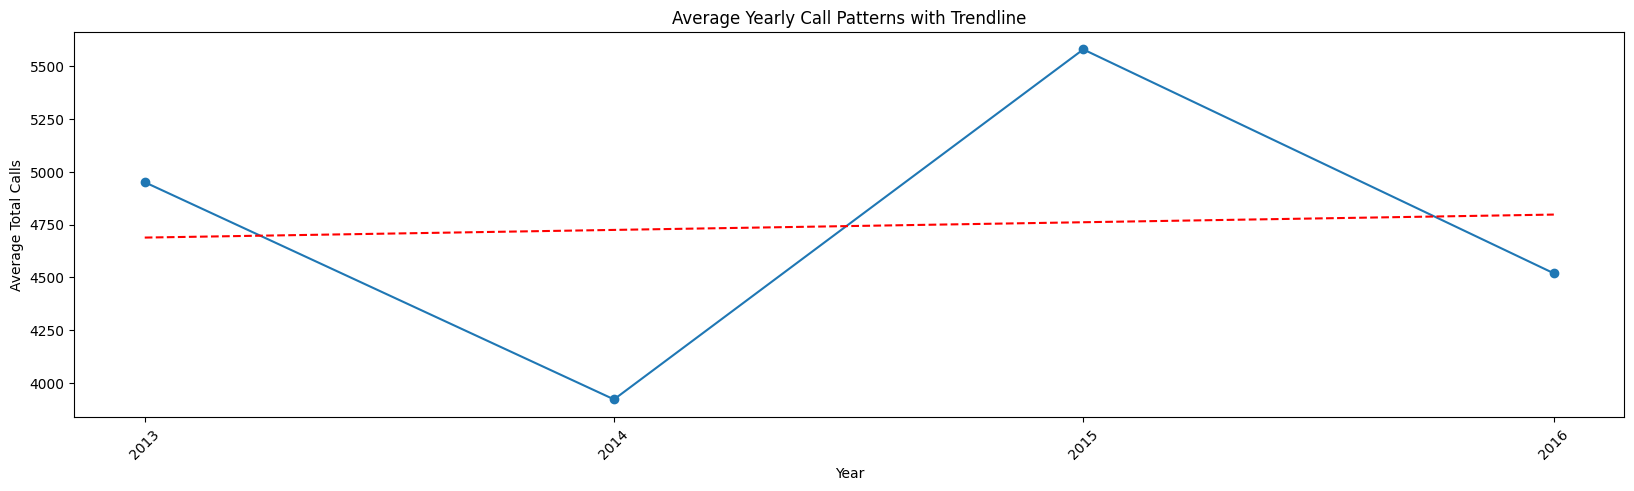

Slope of the trendline: 36.294
The trend is increasing.


In [23]:
# Analyze yearly call patterns
yearly_call_patterns = data_calls_reservations_merge_02.resample("Y", on="date")["calls"].mean()

trendline_coefficients_yearly = np.polyfit(range(len(yearly_call_patterns)), yearly_call_patterns.values, 1)
trendline_yearly = np.poly1d(trendline_coefficients_yearly)

plt.figure(figsize=(20, 5))
plt.plot(yearly_call_patterns.index, yearly_call_patterns.values, label="Total Calls", marker='o')
plt.plot(yearly_call_patterns.index, trendline_yearly(range(len(yearly_call_patterns))), label="Yearly Trendline", color="red", linestyle="--")
plt.title("Average Yearly Call Patterns with Trendline")
plt.xlabel("Year")
plt.ylabel("Average Total Calls")
plt.xticks(yearly_call_patterns.index, [str(year) for year in yearly_call_patterns.index.year], rotation=45)
plt.show()

slope = trendline_coefficients_yearly[0]
print("Slope of the trendline:", round(slope, 3))

if slope > 0:
    print("The trend is increasing.")
elif slope < 0:
    print("The trend is decreasing.")
else:
    print("The trend is flat.")

In [24]:
yearly_call_patterns

date
2013-12-31    4950.298630
2014-12-31    3922.347945
2015-12-31    5578.879452
2016-12-31    4519.100000
Freq: A-DEC, Name: calls, dtype: float64

In [26]:
data_calls_reservations_merge_02.head()

,date,calls,weekday,month_day,month_year,reservations_2months_advance,total_reservations,summer_break,christmas_break,special_day
0,2013-01-01,2429,2,01-01,2013-01,NaN,NaN,0.0,1.0,1.0
1,2013-01-02,3881,3,01-02,2013-01,NaN,NaN,0.0,1.0,0.0
2,2013-01-03,3560,4,01-03,2013-01,NaN,NaN,0.0,0.0,0.0
3,2013-01-04,3155,5,01-04,2013-01,NaN,NaN,0.0,0.0,0.0
4,2013-01-05,1538,6,01-05,2013-01,NaN,NaN,0.0,0.0,0.0


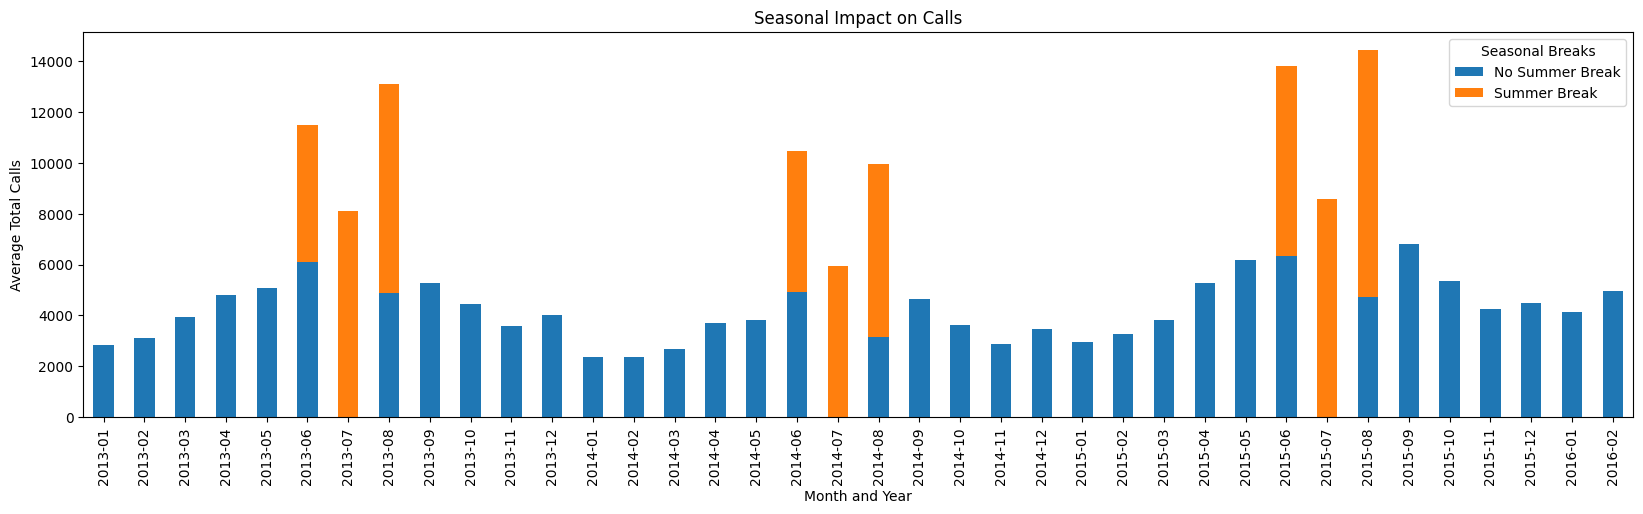

In [27]:
# seasonal impact: summer
seasonal_impact_summer = pd.pivot_table(data_calls_reservations_merge_02, values='calls', index=['month_year'], columns=['summer_break'], aggfunc='mean')
ax = seasonal_impact_summer.plot(kind="bar", stacked=True, figsize=(20, 5))
plt.title("Seasonal Impact on Calls")
plt.xlabel("Month and Year")
plt.ylabel("Average Total Calls")
ax.legend(title="Seasonal Breaks", labels=['No Summer Break', 'Summer Break'])
plt.show()

In [32]:
print(data_calls_reservations_merge_02[data_calls_reservations_merge_02.summer_break==1].calls.sum())
print(data_calls_reservations_merge_02[data_calls_reservations_merge_02.christmas_break==1].calls.sum())
print(data_calls_reservations_merge_02[data_calls_reservations_merge_02.special_day==1].calls.sum())

print(data_calls_reservations_merge_02.calls.sum())

1448999
176612
157933
5545953


In [35]:
(157933/5545953)*100

2.847716163479929

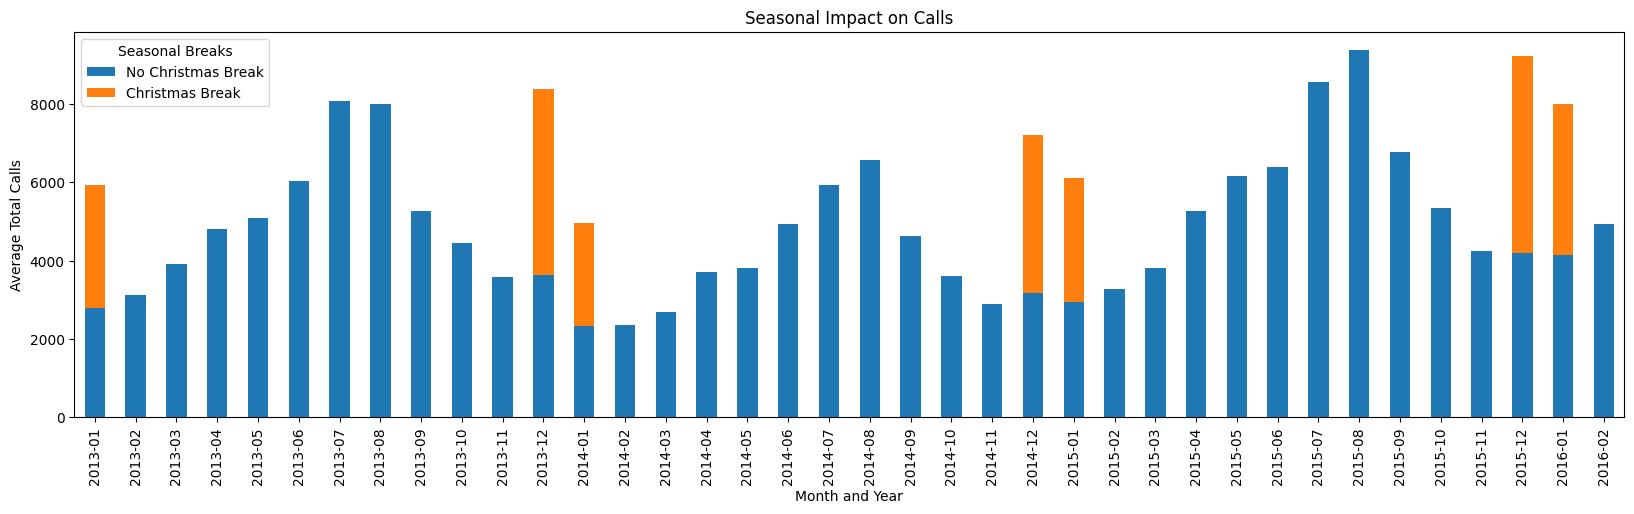

In [28]:
# seasonal impact: christmas
seasonal_impact_christmas = pd.pivot_table(data_calls_reservations_merge_02, values='calls', index=['month_year'], columns=['christmas_break'], aggfunc='mean')
ax = seasonal_impact_christmas.plot(kind="bar", stacked=True, figsize=(20, 5))
plt.title("Seasonal Impact on Calls")
plt.xlabel("Month and Year")
plt.ylabel("Average Total Calls")
ax.legend(title="Seasonal Breaks", labels=['No Christmas Break', 'Christmas Break'])
plt.show()

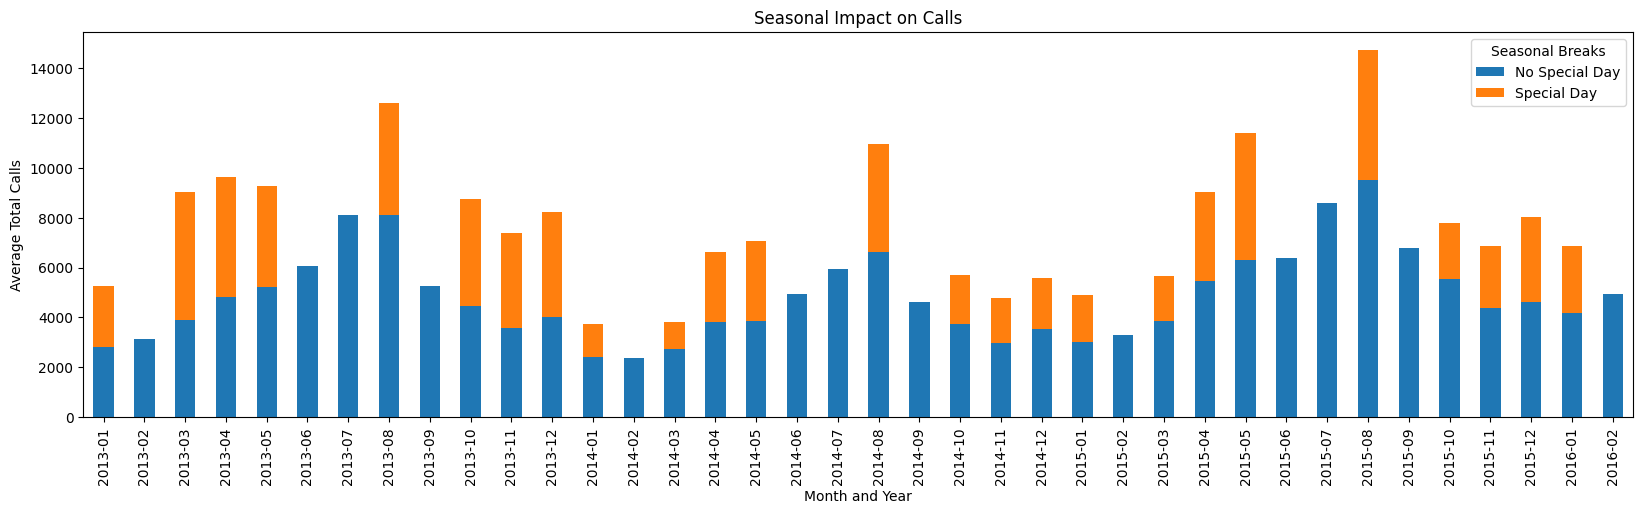

In [29]:
# seasonal impact: special
seasonal_impact_special = pd.pivot_table(data_calls_reservations_merge_02, values='calls', index=['month_year'], columns=['special_day'], aggfunc='mean')
ax = seasonal_impact_special.plot(kind="bar", stacked=True, figsize=(20, 5))
plt.title("Seasonal Impact on Calls")
plt.xlabel("Month and Year")
plt.ylabel("Average Total Calls")
ax.legend(title="Seasonal Breaks", labels=['No Special Day', 'Special Day'])
plt.show()

Reservation

In [36]:
data_calls_reservations_merge_02.head()

,date,calls,weekday,month_day,month_year,reservations_2months_advance,total_reservations,summer_break,christmas_break,special_day
0,2013-01-01,2429,2,01-01,2013-01,NaN,NaN,0.0,1.0,1.0
1,2013-01-02,3881,3,01-02,2013-01,NaN,NaN,0.0,1.0,0.0
2,2013-01-03,3560,4,01-03,2013-01,NaN,NaN,0.0,0.0,0.0
3,2013-01-04,3155,5,01-04,2013-01,NaN,NaN,0.0,0.0,0.0
4,2013-01-05,1538,6,01-05,2013-01,NaN,NaN,0.0,0.0,0.0


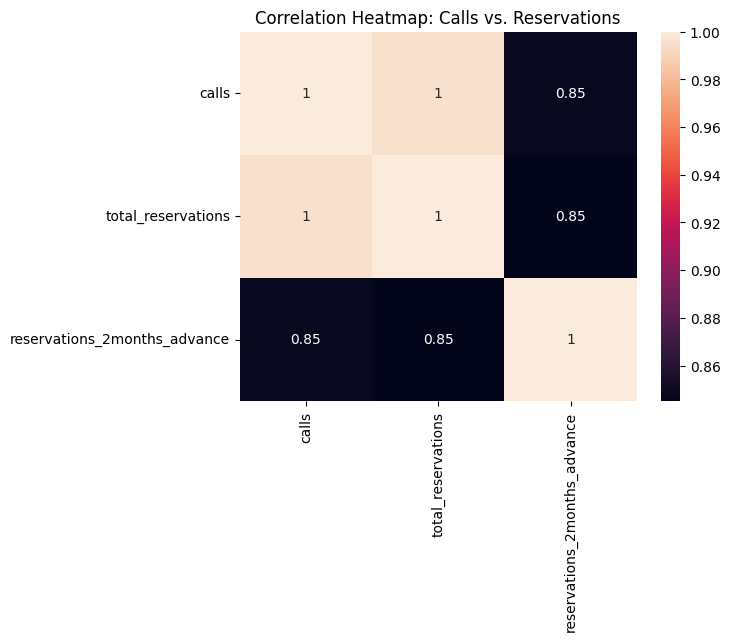

In [37]:
# 4. Correlation Between Reservations and Calls
correlation_matrix = data_calls_reservations_merge_02[["calls", "total_reservations", "reservations_2months_advance"]].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Heatmap: Calls vs. Reservations")
plt.show()

In [38]:
data_calls_reservations_merge_02[data_calls_reservations_merge_02.total_reservations.notna()].head()

,date,calls,weekday,month_day,month_year,reservations_2months_advance,total_reservations,summer_break,christmas_break,special_day
365,2014-01-01,1327,3,01-01,2014-01,1494.0,7794.0,0.0,1.0,1.0
366,2014-01-02,3417,4,01-02,2014-01,2891.0,20074.0,0.0,1.0,0.0
367,2014-01-03,3178,5,01-03,2014-01,2790.0,17905.0,0.0,1.0,0.0
368,2014-01-04,1767,6,01-04,2014-01,2504.0,10880.0,0.0,0.0,0.0
369,2014-01-05,1374,7,01-05,2014-01,1522.0,8333.0,0.0,0.0,0.0


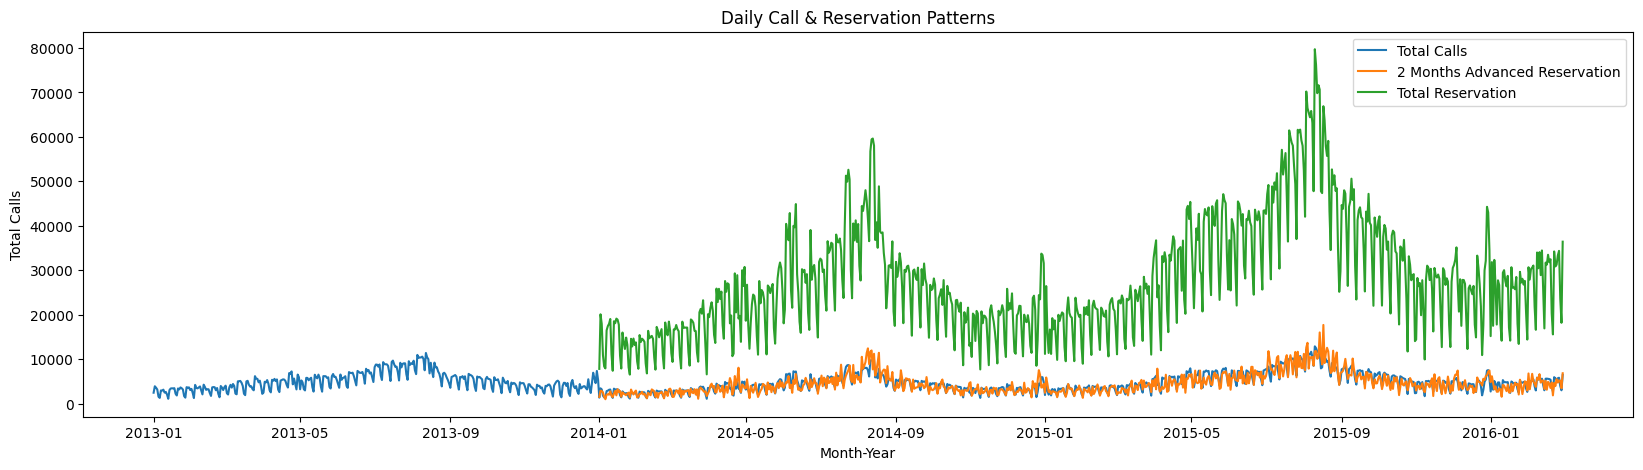

In [39]:
# reservations over total calls
plt.figure(figsize=(20, 5))
plt.plot(data_calls_reservations_merge_02["date"], data_calls_reservations_merge_02["calls"], label="Total Calls")
plt.plot(data_calls_reservations_merge_02["date"], data_calls_reservations_merge_02["reservations_2months_advance"], label="2 Months Advanced Reservations")
plt.plot(data_calls_reservations_merge_02["date"], data_calls_reservations_merge_02["total_reservations"], label="Total Reservations")
plt.title("Daily Call & Reservation Patterns")
plt.xlabel("Month-Year")
plt.ylabel("Total Calls")
plt.legend(labels=['Total Calls', '2 Months Advanced Reservation', 'Total Reservation',])
plt.show()

In [40]:
print(data_calls_reservations_merge_02.calls.sum())
print(data_calls_reservations_merge_02.total_reservations.sum())
print(data_calls_reservations_merge_02.reservations_2months_advance.sum())

5545953
21875090.0
3601108.0


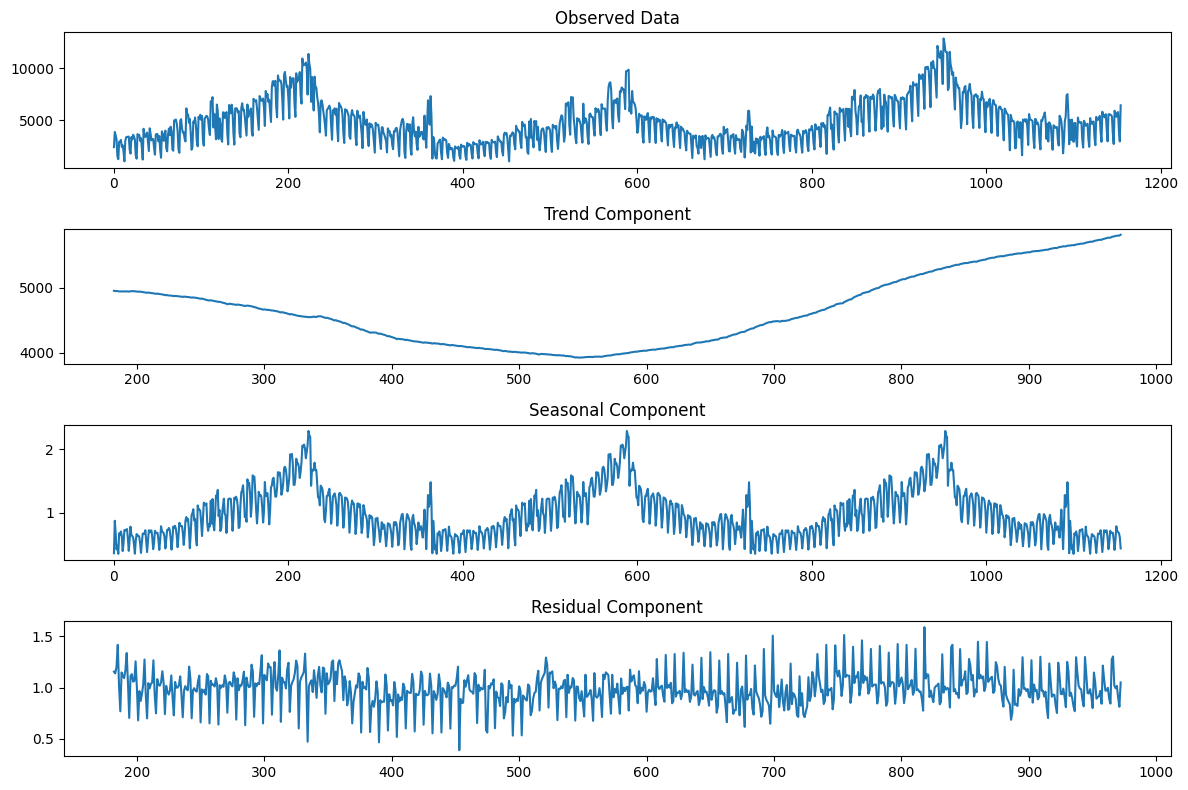

In [34]:
# seasonal decomp
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose daily call trends into trend, seasonal, and residual components
result = seasonal_decompose(data_calls_reservations_merge_02["calls"], model="multiplicative", period=365)

# Visualize decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(result.observed, label='Observed')
plt.title('Observed Data')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

In [35]:
data_calls_reservations_merge_02.head()

,date,calls,weekday,month_day,month_year,reservations_2months_advance,total_reservations,summer_break,christmas_break,special_day
0,2013-01-01,2429,2,01-01,2013-01,NaN,NaN,0.0,1.0,1.0
1,2013-01-02,3881,3,01-02,2013-01,NaN,NaN,0.0,1.0,0.0
2,2013-01-03,3560,4,01-03,2013-01,NaN,NaN,0.0,0.0,0.0
3,2013-01-04,3155,5,01-04,2013-01,NaN,NaN,0.0,0.0,0.0
4,2013-01-05,1538,6,01-05,2013-01,NaN,NaN,0.0,0.0,0.0


In [37]:
# save data to interim
data_calls_reservations_merge_02.to_csv(f'{INTERIM_PATH}\data_calls_reservation.csv', index=False, sep=";")